# Laden

In [1]:


#  CSV erkennen by David Maksimovic 24.06.2019
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
#import keras

#from keras import regularizers
from tensorflow import keras
from tensorflow.keras import regularizers, layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,LeakyReLU, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping
import time
import pickle
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import pydot_ng as pydot
import numpy as np
import glob
import os
import random

from sklearn.utils import class_weight

########### Normalisieren ###########

#Ist schon normalisiert
########### Normalisieren ###########

#Ist schon normalisiert

In [2]:
X=pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/X_Beamlike_PI_Pure_LAPPD(15x40)_120k_Files.pickle","rb"))
Y=pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/Y_Beamlike_PI_Pure_LAPPD(15x40)_120k_Files.pickle","rb"))

In [1]:
# Timeflipped

In [2]:
X=pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/X_Beamlike_PID_Pure_LAPPD(15x40)_Timeflipped_120k_Files.pickle","rb"))
Y=pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/Y_Beamlike_PID_Pure_LAPPD(15x40)_Timeflipped_120k_Files.pickle","rb"))

In [3]:
unique, counts = np.unique(Y, return_counts=True, axis=0)
print("How much from one kind, how much from the other: \n",counts)
print("How do they look like? \n",unique)
print("Percentage of one kind: \n", 100/(counts[0]+counts[1])*counts[1])

How much from one kind, how much from the other: 
 [59977 60028]
How do they look like? 
 [[0 1]
 [1 0]]
Percentage of one kind: 
 50.021249114620225


In [5]:
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
from datetime import datetime


import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib.colors import DivergingNorm
from matplotlib import ticker, cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap


In [6]:


viridis = cm.get_cmap('viridis', 256)
newcolors = viridis(np.linspace(0, 1, 256))
black = np.array([0, 0, 0, 1])
newcolors[0, :] = black

newcmp = ListedColormap(newcolors)

viridis_r = cm.get_cmap('viridis_r', 256)
newcolors_r = viridis_r(np.linspace(0, 1, 256))
black_r = np.array([0, 0, 0, 1])
newcolors_r[0, :] = black_r

newcmp_r = ListedColormap(newcolors_r)
plt.rcParams['figure.figsize'] = [17/1.1, 9/1.1]


font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

plt.rc('font', **font)


SMALL_SIZE = 13
MEDIUM_SIZE = 15
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title
title_font = {'fontname':'Arial', 'size':'20', 'color':'black', 'weight':'bold',
              #'verticalalignment':'bottom'
             }


b=range(0,50,1)#130 im Normalen set           und  im Testset 211 und 611
for a in b:
    if (YTraining[a] == (1,0)).all():
        Title="Muon"
        
        
        #print(Title)
    else:
        Title="Electron"
        #print(Title)
    #4, 15
    fig, (ax1, ax2) = plt.subplots(ncols=2) #ncols=2

    img1 = ax1.imshow(XTraining[a,:,:,0], cmap=newcmp, interpolation='None',extent=[-180,180,-90,90])
    divider = make_axes_locatable(ax1)
    cax1 = divider.append_axes("right", size="5%", pad=0.05)
    ax1.set_title('Charge')
    ax1.set_xlabel('Theta')
    ax1.set_ylabel('Phi')
    ax1.text(120, 75, '{}'.format(Title), #style='italic',
            bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})
    cbar = fig.colorbar(img1, cax=cax1)
    cbar.set_label('Normed charge', rotation=270)
    cbar.ax.get_yaxis().labelpad = 15







    #img2 = ax2.imshow(X[a,:,:,1], cmap='twilight_shifted', interpolation='None',norm=DivergingNorm(0.18), extent=[-180,180,-90,90])
    img2 = ax2.imshow(XTraining[a,:,:,1], cmap=newcmp_r, interpolation='None',
                      #norm=DivergingNorm(0.105),
                      extent=[-180,180,-90,90])
    divider = make_axes_locatable(ax2)
    cax2 = divider.append_axes("right", size="5%", pad=0.05)
    ax2.set_title('Time')
    ax2.set_xlabel('Theta')
    ax2.set_ylabel('Phi')
    ax2.text(120, 75, '{}'.format(Title), #style='italic',
            bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})

    ax2.text(215, -75, 'Early') #style='italic')
            #bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})
    ax2.text(215, +70, 'Late')



    cbar2 = fig.colorbar(img2, cax=cax2)
    cbar2.set_label('Normed time', rotation=270)
    cbar2.ax.get_yaxis().labelpad = 15


    plt.tight_layout(h_pad=1)

NameError: name 'YTraining' is not defined

 # 23k Set

## 120k Set

In [3]:
training_data = list(zip(X, Y))
import random
random.shuffle(training_data)

for sample in training_data[:5]:
    print("Eintrag \n", sample[1])

X1 =[]
Y1 =[]

for x in training_data[:85000]:
    
    X1.append(x[0])
    Y1.append(x[1])
    
    
XTraining = np.array(X1)
YTraining = np.array(Y1)

X2 =[]
Y2 =[]

for x in training_data[85000:105000]:
    
    X2.append(x[0])
    Y2.append(x[1])
    
    
XVal = np.array(X2)
Yval = np.array(Y2)

X3 =[]
Y3 =[]

for x in training_data[105000:]:
    
    X3.append(x[0])
    Y3.append(x[1])
    
    
XTest = np.array(X3)
YTest = np.array(Y3)

print(XTraining.shape,XVal.shape,XTest.shape)
del X,Y,X1,X2,X3,Y1,Y2,Y3

Eintrag 
 [1 0]
Eintrag 
 [1 0]
Eintrag 
 [1 0]
Eintrag 
 [1 0]
Eintrag 
 [0 1]
(85000, 15, 40, 2) (20000, 15, 40, 2) (15005, 15, 40, 2)


## Do I want 50/50?

In [208]:
YTrainingnew=[]
XTrainingnew=[]
index=index2=index3=0
for i in YTraining:
    
    if i[0]==1 and index2 <35000:
        XTrainingnew.append(XTraining[index])
        YTrainingnew.append(YTraining[index])
        index2=index2+1
        
    if i[1]==1 and index3 <35000:
        XTrainingnew.append(XTraining[index])
        YTrainingnew.append(YTraining[index])
        index3=index3+1
        
    index=index+1
YTrainingnew=np.array(YTrainingnew)
XTrainingnew=np.array(XTrainingnew)

### Val:
Yvalnew=[]
XValnew=[]
index=index2=index3=0
for i in Yval:
    
    if i[0]==1 and index2 <7000:
        XValnew.append(XVal[index])
        Yvalnew.append(Yval[index])
        index2=index2+1
        
    if i[1]==1 and index3 <7000:
        XValnew.append(XVal[index])
        Yvalnew.append(Yval[index])
        index3=index3+1
        
    index=index+1
Yvalnew=np.array(Yvalnew)
XValnew=np.array(XValnew)

# Testen der besten Methode

Weights

In [8]:

y_ints = [y.argmax() for y in YTrainingnew]
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_ints),
                                                 y_ints)

NameError: name 'YTrainingnew' is not defined

In [197]:
class_weights

array([1., 1.])

# Modelle Testen

W0526 00:03:08.850466 20456 deprecation.py:323] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Tensorflow\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 15, 40, 160)       1440      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 20, 160)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 8, 20, 160)        640       
_________________________________________________________________
dropout_3 (Dropout)          (None, 8, 20, 160)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 20, 160)        102560    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 10, 160)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 4, 10, 160)       

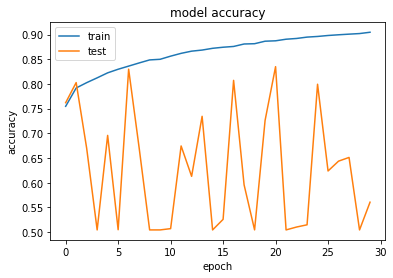

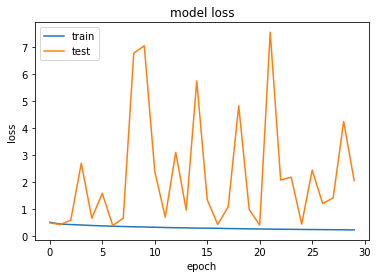

Ende des Versuchs: 
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 15, 40, 160)       1440      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 20, 160)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 8, 20, 160)        640       
_________________________________________________________________
dropout_6 (Dropout)          (None, 8, 20, 160)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 20, 160)        102560    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 10, 160)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None

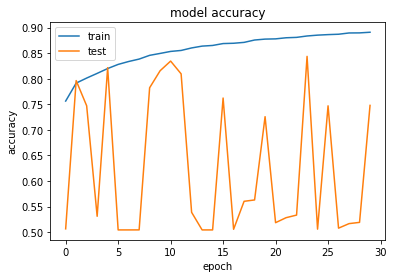

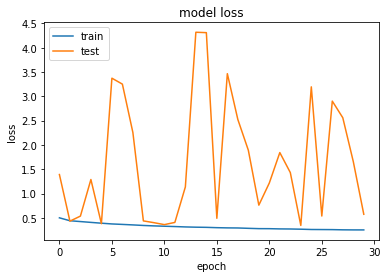

Ende des Versuchs: 
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 15, 40, 190)       1710      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 20, 190)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 8, 20, 190)        760       
_________________________________________________________________
dropout_10 (Dropout)         (None, 8, 20, 190)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 20, 190)        144590    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 10, 190)        0         
_________________________________________________________________
batch_normalization_11 (Batc (None

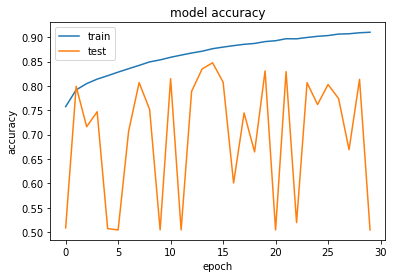

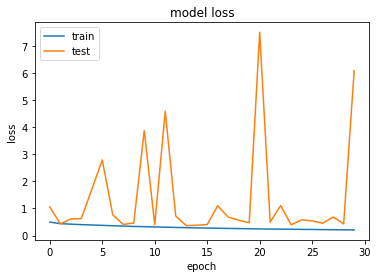

Ende des Versuchs: 
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 15, 40, 190)       1710      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 8, 20, 190)        0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 8, 20, 190)        760       
_________________________________________________________________
dropout_13 (Dropout)         (None, 8, 20, 190)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 8, 20, 190)        144590    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 4, 10, 190)        0         
_________________________________________________________________
batch_normalization_14 (Batc (None

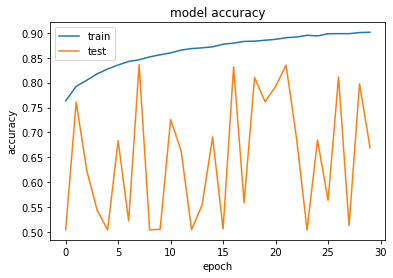

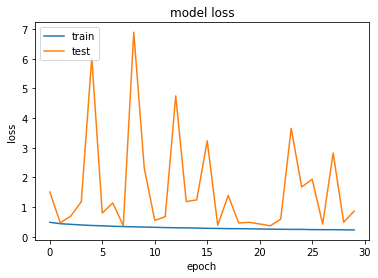

Ende des Versuchs: 
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 15, 40, 200)       1800      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 8, 20, 200)        0         
_________________________________________________________________
batch_normalization_17 (Batc (None, 8, 20, 200)        800       
_________________________________________________________________
dropout_17 (Dropout)         (None, 8, 20, 200)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 8, 20, 200)        160200    
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 4, 10, 200)        0         
_________________________________________________________________
batch_normalization_18 (Batc (None

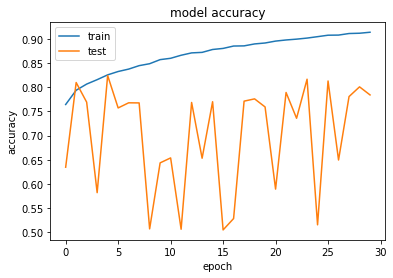

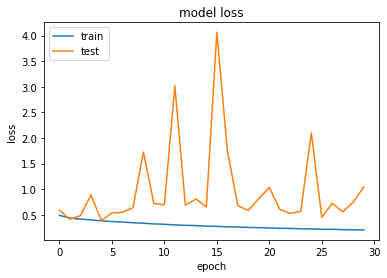

Ende des Versuchs: 
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 15, 40, 200)       1800      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 8, 20, 200)        0         
_________________________________________________________________
batch_normalization_20 (Batc (None, 8, 20, 200)        800       
_________________________________________________________________
dropout_20 (Dropout)         (None, 8, 20, 200)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 8, 20, 200)        160200    
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 4, 10, 200)        0         
_________________________________________________________________
batch_normalization_21 (Batc (None

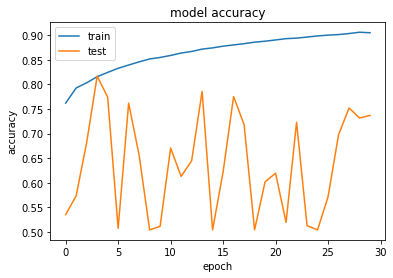

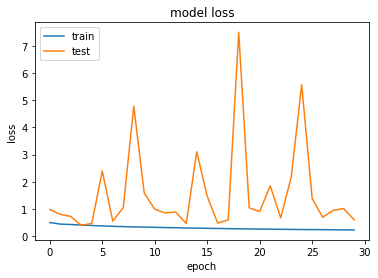

Ende des Versuchs: 
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 15, 40, 160)       1440      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 8, 20, 160)        0         
_________________________________________________________________
batch_normalization_24 (Batc (None, 8, 20, 160)        640       
_________________________________________________________________
dropout_24 (Dropout)         (None, 8, 20, 160)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 8, 20, 160)        102560    
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 4, 10, 160)        0         
_________________________________________________________________
batch_normalization_25 (Batc (None

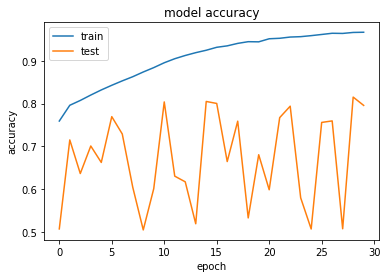

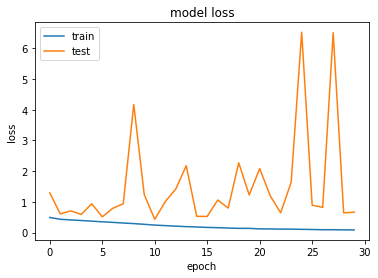

Ende des Versuchs: 
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 15, 40, 160)       1440      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 8, 20, 160)        0         
_________________________________________________________________
batch_normalization_28 (Batc (None, 8, 20, 160)        640       
_________________________________________________________________
dropout_28 (Dropout)         (None, 8, 20, 160)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 8, 20, 160)        102560    
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 4, 10, 160)        0         
_________________________________________________________________
batch_normalization_29 (Batc (None

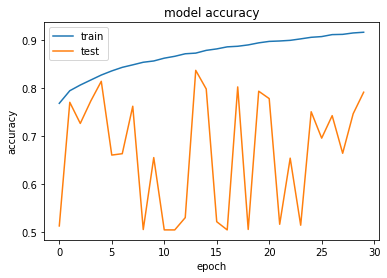

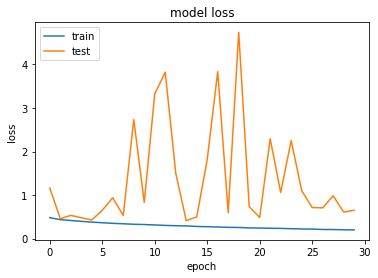

Ende des Versuchs: 
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 15, 40, 190)       1710      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 8, 20, 190)        0         
_________________________________________________________________
batch_normalization_33 (Batc (None, 8, 20, 190)        760       
_________________________________________________________________
dropout_33 (Dropout)         (None, 8, 20, 190)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 8, 20, 190)        144590    
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 4, 10, 190)        0         
_________________________________________________________________
batch_normalization_34 (Batc (None

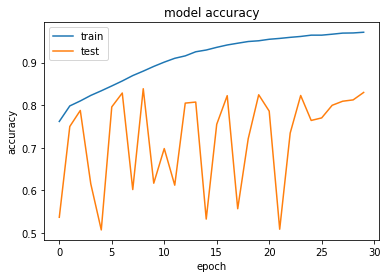

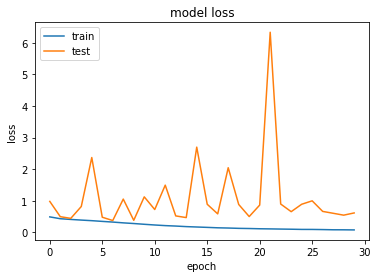

Ende des Versuchs: 
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 15, 40, 190)       1710      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 8, 20, 190)        0         
_________________________________________________________________
batch_normalization_37 (Batc (None, 8, 20, 190)        760       
_________________________________________________________________
dropout_37 (Dropout)         (None, 8, 20, 190)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 8, 20, 190)        144590    
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 4, 10, 190)        0         
_________________________________________________________________
batch_normalization_38 (Batc (Non

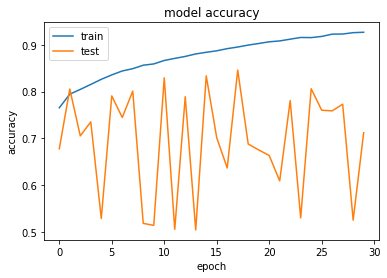

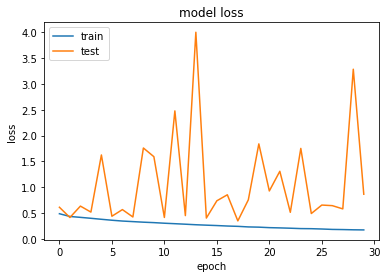

Ende des Versuchs: 
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 15, 40, 200)       1800      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 8, 20, 200)        0         
_________________________________________________________________
batch_normalization_42 (Batc (None, 8, 20, 200)        800       
_________________________________________________________________
dropout_42 (Dropout)         (None, 8, 20, 200)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 8, 20, 200)        160200    
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 4, 10, 200)        0         
_________________________________________________________________
batch_normalization_43 (Batc (Non

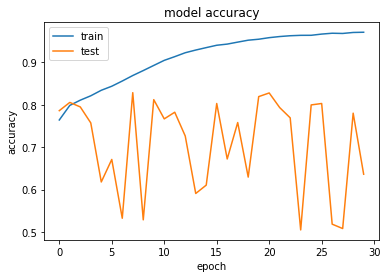

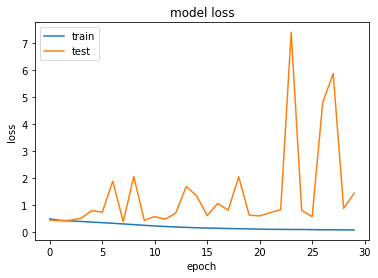

Ende des Versuchs: 
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 15, 40, 200)       1800      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 8, 20, 200)        0         
_________________________________________________________________
batch_normalization_46 (Batc (None, 8, 20, 200)        800       
_________________________________________________________________
dropout_46 (Dropout)         (None, 8, 20, 200)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 8, 20, 200)        160200    
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 4, 10, 200)        0         
_________________________________________________________________
batch_normalization_47 (Batc (Non

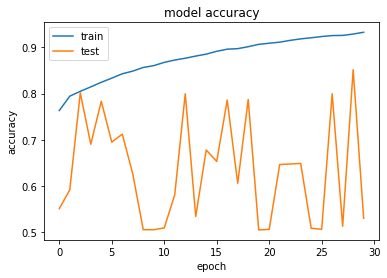

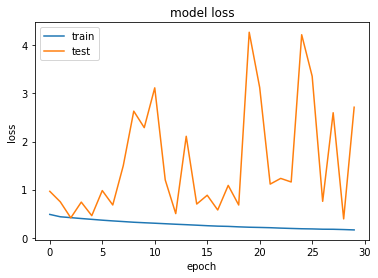

Ende des Versuchs: 
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 15, 40, 160)       3040      
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 8, 20, 160)        0         
_________________________________________________________________
batch_normalization_51 (Batc (None, 8, 20, 160)        640       
_________________________________________________________________
dropout_51 (Dropout)         (None, 8, 20, 160)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 8, 20, 160)        230560    
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 4, 10, 160)        0         
_________________________________________________________________
batch_normalization_52 (Batc (Non

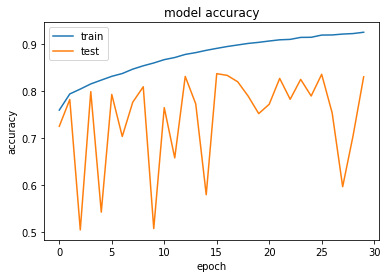

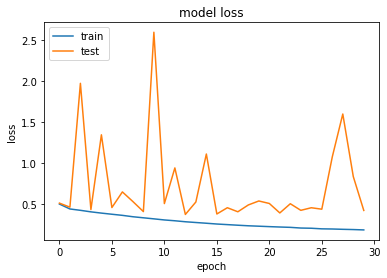

Ende des Versuchs: 
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 15, 40, 160)       3040      
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 8, 20, 160)        0         
_________________________________________________________________
batch_normalization_54 (Batc (None, 8, 20, 160)        640       
_________________________________________________________________
dropout_54 (Dropout)         (None, 8, 20, 160)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 8, 20, 160)        230560    
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 4, 10, 160)        0         
_________________________________________________________________
batch_normalization_55 (Batc (Non

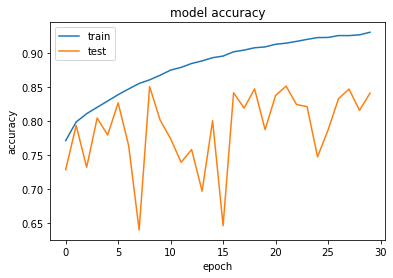

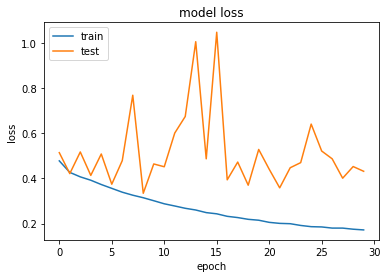

Ende des Versuchs: 
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 15, 40, 190)       3610      
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 8, 20, 190)        0         
_________________________________________________________________
batch_normalization_58 (Batc (None, 8, 20, 190)        760       
_________________________________________________________________
dropout_58 (Dropout)         (None, 8, 20, 190)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 8, 20, 190)        325090    
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 4, 10, 190)        0         
_________________________________________________________________
batch_normalization_59 (Batc (Non

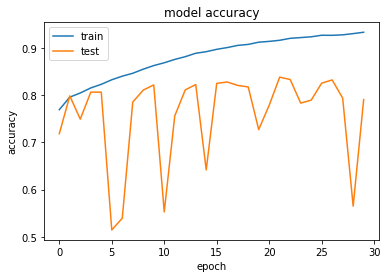

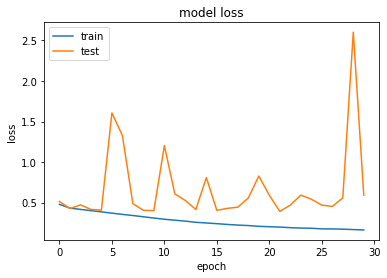

Ende des Versuchs: 
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 15, 40, 190)       3610      
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 8, 20, 190)        0         
_________________________________________________________________
batch_normalization_61 (Batc (None, 8, 20, 190)        760       
_________________________________________________________________
dropout_61 (Dropout)         (None, 8, 20, 190)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 8, 20, 190)        325090    
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 4, 10, 190)        0         
_________________________________________________________________
batch_normalization_62 (Batc (Non

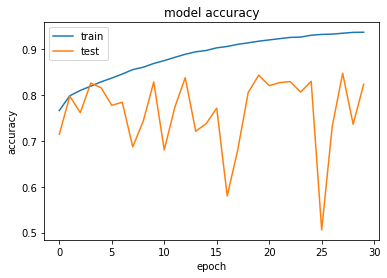

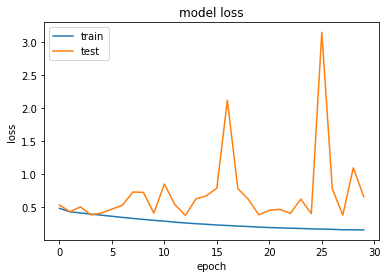

Ende des Versuchs: 
Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 15, 40, 200)       3800      
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 8, 20, 200)        0         
_________________________________________________________________
batch_normalization_65 (Batc (None, 8, 20, 200)        800       
_________________________________________________________________
dropout_65 (Dropout)         (None, 8, 20, 200)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 8, 20, 200)        360200    
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 4, 10, 200)        0         
_________________________________________________________________
batch_normalization_66 (Batc (Non

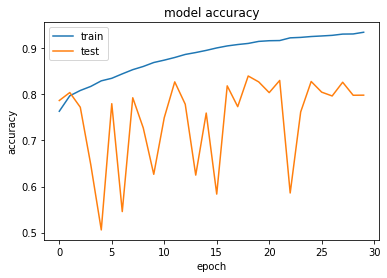

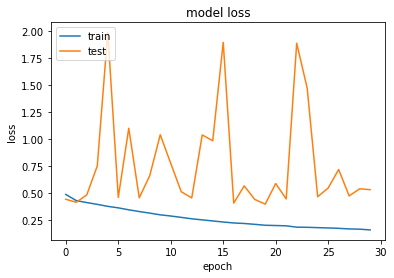

Ende des Versuchs: 
Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 15, 40, 200)       3800      
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 8, 20, 200)        0         
_________________________________________________________________
batch_normalization_68 (Batc (None, 8, 20, 200)        800       
_________________________________________________________________
dropout_68 (Dropout)         (None, 8, 20, 200)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 8, 20, 200)        360200    
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 4, 10, 200)        0         
_________________________________________________________________
batch_normalization_69 (Batc (Non

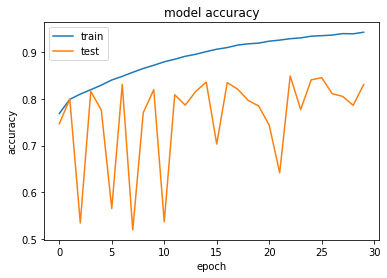

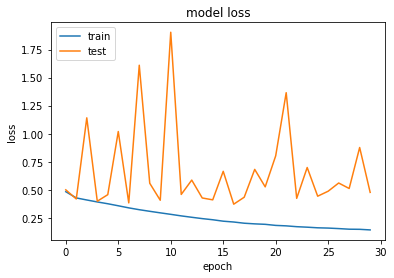

Ende des Versuchs: 
Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_47 (Conv2D)           (None, 15, 40, 160)       3040      
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 8, 20, 160)        0         
_________________________________________________________________
batch_normalization_72 (Batc (None, 8, 20, 160)        640       
_________________________________________________________________
dropout_72 (Dropout)         (None, 8, 20, 160)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 8, 20, 160)        230560    
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 4, 10, 160)        0         
_________________________________________________________________
batch_normalization_73 (Batc (Non

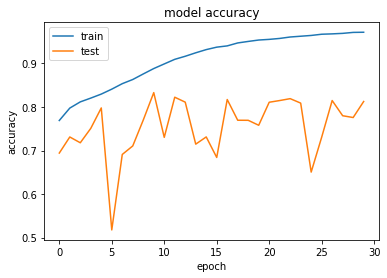

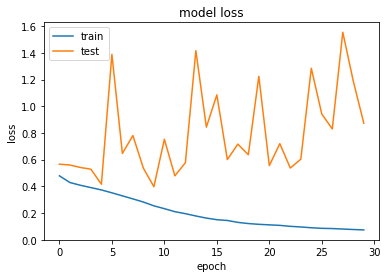

Ende des Versuchs: 
Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 15, 40, 160)       3040      
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 8, 20, 160)        0         
_________________________________________________________________
batch_normalization_76 (Batc (None, 8, 20, 160)        640       
_________________________________________________________________
dropout_76 (Dropout)         (None, 8, 20, 160)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 8, 20, 160)        230560    
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 4, 10, 160)        0         
_________________________________________________________________
batch_normalization_77 (Batc (Non

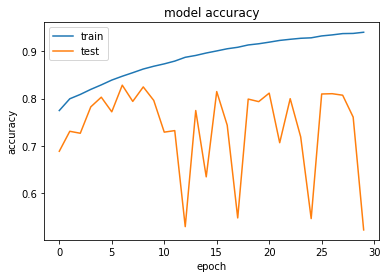

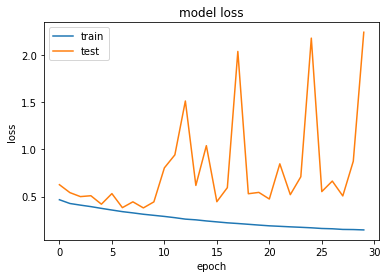

Ende des Versuchs: 
Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 15, 40, 190)       3610      
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 8, 20, 190)        0         
_________________________________________________________________
batch_normalization_81 (Batc (None, 8, 20, 190)        760       
_________________________________________________________________
dropout_81 (Dropout)         (None, 8, 20, 190)        0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 8, 20, 190)        325090    
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 4, 10, 190)        0         
_________________________________________________________________
batch_normalization_82 (Batc (Non

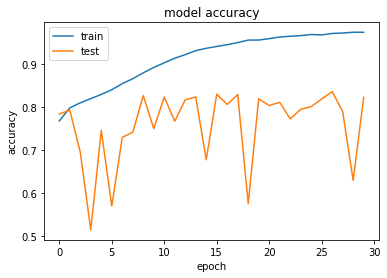

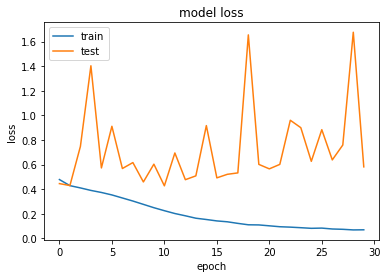

Ende des Versuchs: 
Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 15, 40, 190)       3610      
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 8, 20, 190)        0         
_________________________________________________________________
batch_normalization_85 (Batc (None, 8, 20, 190)        760       
_________________________________________________________________
dropout_85 (Dropout)         (None, 8, 20, 190)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 8, 20, 190)        325090    
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 4, 10, 190)        0         
_________________________________________________________________
batch_normalization_86 (Batc (Non

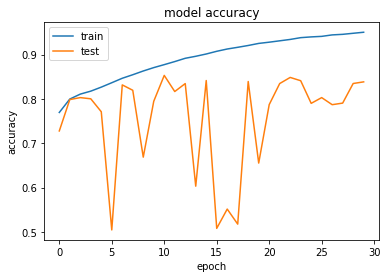

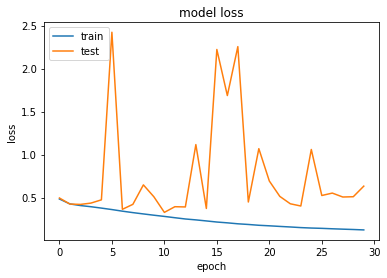

Ende des Versuchs: 
Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_57 (Conv2D)           (None, 15, 40, 200)       3800      
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 8, 20, 200)        0         
_________________________________________________________________
batch_normalization_90 (Batc (None, 8, 20, 200)        800       
_________________________________________________________________
dropout_90 (Dropout)         (None, 8, 20, 200)        0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 8, 20, 200)        360200    
_________________________________________________________________
max_pooling2d_58 (MaxPooling (None, 4, 10, 200)        0         
_________________________________________________________________
batch_normalization_91 (Batc (Non

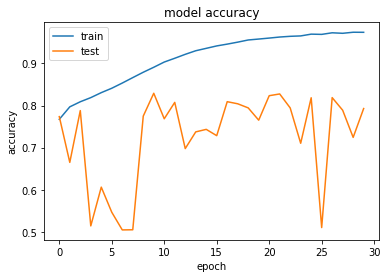

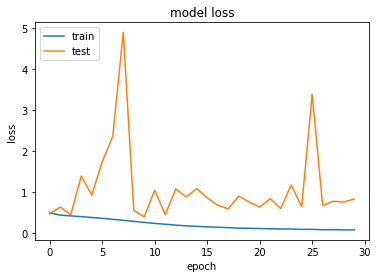

Ende des Versuchs: 
Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_59 (Conv2D)           (None, 15, 40, 200)       3800      
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 8, 20, 200)        0         
_________________________________________________________________
batch_normalization_94 (Batc (None, 8, 20, 200)        800       
_________________________________________________________________
dropout_94 (Dropout)         (None, 8, 20, 200)        0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 8, 20, 200)        360200    
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 4, 10, 200)        0         
_________________________________________________________________
batch_normalization_95 (Batc (Non

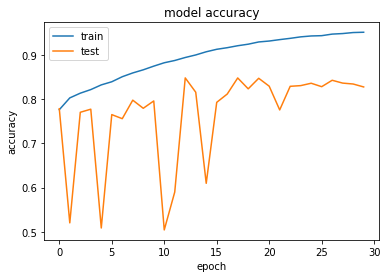

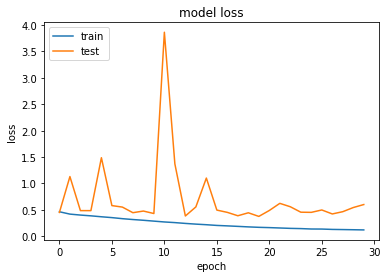

Ende des Versuchs: 
Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_62 (Conv2D)           (None, 15, 40, 160)       5280      
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 8, 20, 160)        0         
_________________________________________________________________
batch_normalization_99 (Batc (None, 8, 20, 160)        640       
_________________________________________________________________
dropout_99 (Dropout)         (None, 8, 20, 160)        0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 8, 20, 160)        409760    
_________________________________________________________________
max_pooling2d_63 (MaxPooling (None, 4, 10, 160)        0         
_________________________________________________________________
batch_normalization_100 (Bat (Non

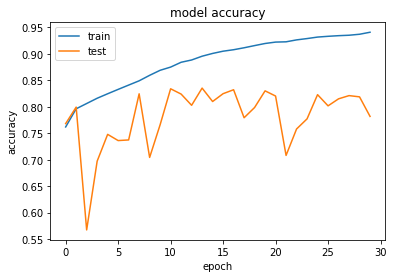

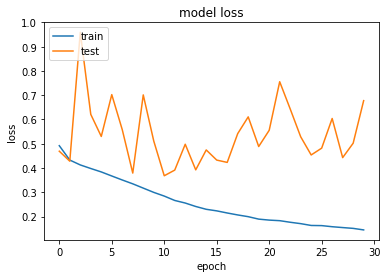

Ende des Versuchs: 
Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_64 (Conv2D)           (None, 15, 40, 160)       5280      
_________________________________________________________________
max_pooling2d_64 (MaxPooling (None, 8, 20, 160)        0         
_________________________________________________________________
batch_normalization_102 (Bat (None, 8, 20, 160)        640       
_________________________________________________________________
dropout_102 (Dropout)        (None, 8, 20, 160)        0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 8, 20, 160)        409760    
_________________________________________________________________
max_pooling2d_65 (MaxPooling (None, 4, 10, 160)        0         
_________________________________________________________________
batch_normalization_103 (Bat (Non

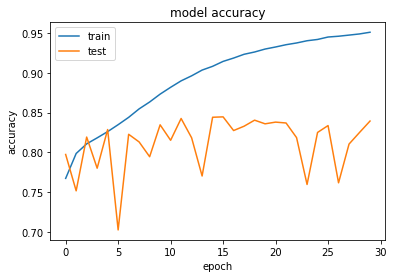

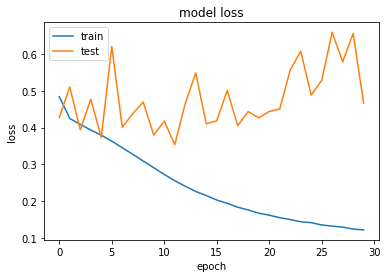

Ende des Versuchs: 
Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_67 (Conv2D)           (None, 15, 40, 190)       6270      
_________________________________________________________________
max_pooling2d_67 (MaxPooling (None, 8, 20, 190)        0         
_________________________________________________________________
batch_normalization_106 (Bat (None, 8, 20, 190)        760       
_________________________________________________________________
dropout_106 (Dropout)        (None, 8, 20, 190)        0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 8, 20, 190)        577790    
_________________________________________________________________
max_pooling2d_68 (MaxPooling (None, 4, 10, 190)        0         
_________________________________________________________________
batch_normalization_107 (Bat (Non

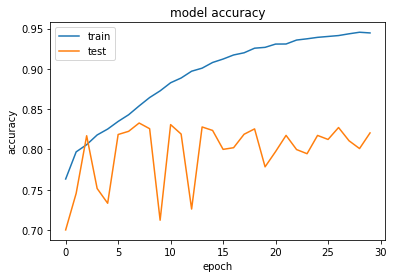

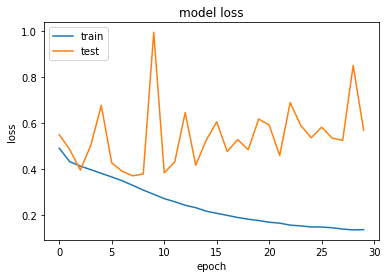

Ende des Versuchs: 
Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_69 (Conv2D)           (None, 15, 40, 190)       6270      
_________________________________________________________________
max_pooling2d_69 (MaxPooling (None, 8, 20, 190)        0         
_________________________________________________________________
batch_normalization_109 (Bat (None, 8, 20, 190)        760       
_________________________________________________________________
dropout_109 (Dropout)        (None, 8, 20, 190)        0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 8, 20, 190)        577790    
_________________________________________________________________
max_pooling2d_70 (MaxPooling (None, 4, 10, 190)        0         
_________________________________________________________________
batch_normalization_110 (Bat (Non

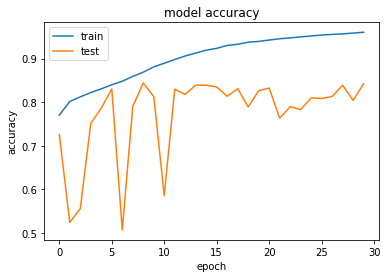

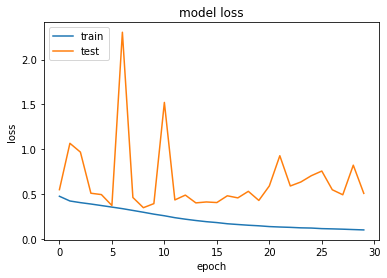

Ende des Versuchs: 
Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_72 (Conv2D)           (None, 15, 40, 200)       6600      
_________________________________________________________________
max_pooling2d_72 (MaxPooling (None, 8, 20, 200)        0         
_________________________________________________________________
batch_normalization_113 (Bat (None, 8, 20, 200)        800       
_________________________________________________________________
dropout_113 (Dropout)        (None, 8, 20, 200)        0         
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 8, 20, 200)        640200    
_________________________________________________________________
max_pooling2d_73 (MaxPooling (None, 4, 10, 200)        0         
_________________________________________________________________
batch_normalization_114 (Bat (Non

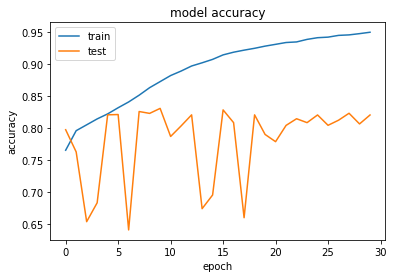

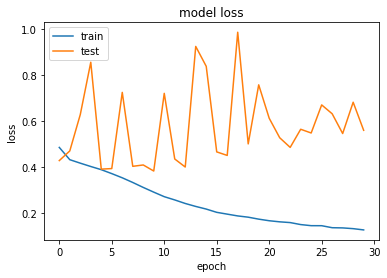

Ende des Versuchs: 
Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_74 (Conv2D)           (None, 15, 40, 200)       6600      
_________________________________________________________________
max_pooling2d_74 (MaxPooling (None, 8, 20, 200)        0         
_________________________________________________________________
batch_normalization_116 (Bat (None, 8, 20, 200)        800       
_________________________________________________________________
dropout_116 (Dropout)        (None, 8, 20, 200)        0         
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 8, 20, 200)        640200    
_________________________________________________________________
max_pooling2d_75 (MaxPooling (None, 4, 10, 200)        0         
_________________________________________________________________
batch_normalization_117 (Bat (Non

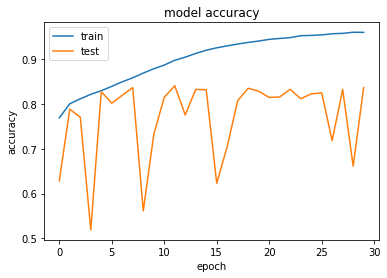

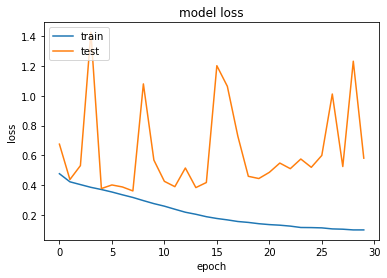

Ende des Versuchs: 
Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_77 (Conv2D)           (None, 15, 40, 160)       5280      
_________________________________________________________________
max_pooling2d_77 (MaxPooling (None, 8, 20, 160)        0         
_________________________________________________________________
batch_normalization_120 (Bat (None, 8, 20, 160)        640       
_________________________________________________________________
dropout_120 (Dropout)        (None, 8, 20, 160)        0         
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 8, 20, 160)        409760    
_________________________________________________________________
max_pooling2d_78 (MaxPooling (None, 4, 10, 160)        0         
_________________________________________________________________
batch_normalization_121 (Bat (Non

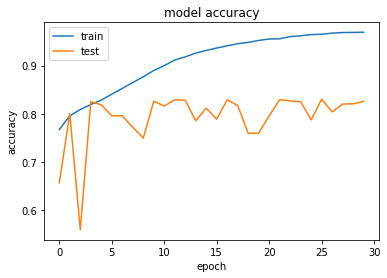

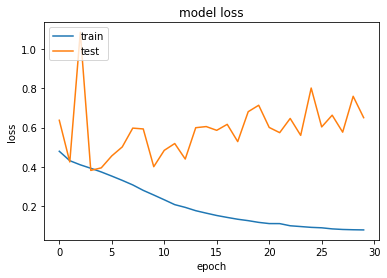

Ende des Versuchs: 
Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_79 (Conv2D)           (None, 15, 40, 160)       5280      
_________________________________________________________________
max_pooling2d_79 (MaxPooling (None, 8, 20, 160)        0         
_________________________________________________________________
batch_normalization_124 (Bat (None, 8, 20, 160)        640       
_________________________________________________________________
dropout_124 (Dropout)        (None, 8, 20, 160)        0         
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 8, 20, 160)        409760    
_________________________________________________________________
max_pooling2d_80 (MaxPooling (None, 4, 10, 160)        0         
_________________________________________________________________
batch_normalization_125 (Bat (Non

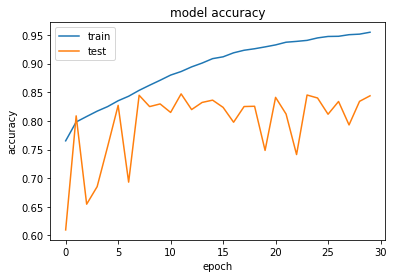

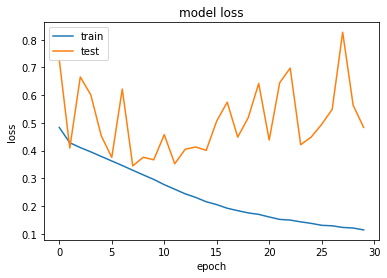

Ende des Versuchs: 
Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_82 (Conv2D)           (None, 15, 40, 190)       6270      
_________________________________________________________________
max_pooling2d_82 (MaxPooling (None, 8, 20, 190)        0         
_________________________________________________________________
batch_normalization_129 (Bat (None, 8, 20, 190)        760       
_________________________________________________________________
dropout_129 (Dropout)        (None, 8, 20, 190)        0         
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 8, 20, 190)        577790    
_________________________________________________________________
max_pooling2d_83 (MaxPooling (None, 4, 10, 190)        0         
_________________________________________________________________
batch_normalization_130 (Bat (Non

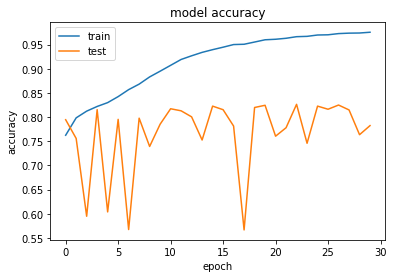

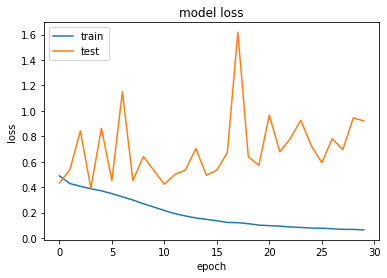

Ende des Versuchs: 
Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_84 (Conv2D)           (None, 15, 40, 190)       6270      
_________________________________________________________________
max_pooling2d_84 (MaxPooling (None, 8, 20, 190)        0         
_________________________________________________________________
batch_normalization_133 (Bat (None, 8, 20, 190)        760       
_________________________________________________________________
dropout_133 (Dropout)        (None, 8, 20, 190)        0         
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 8, 20, 190)        577790    
_________________________________________________________________
max_pooling2d_85 (MaxPooling (None, 4, 10, 190)        0         
_________________________________________________________________
batch_normalization_134 (Bat (Non

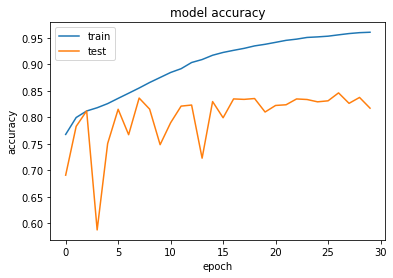

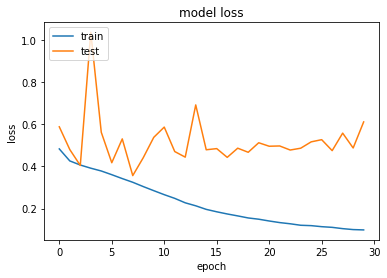

Ende des Versuchs: 
Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_87 (Conv2D)           (None, 15, 40, 200)       6600      
_________________________________________________________________
max_pooling2d_87 (MaxPooling (None, 8, 20, 200)        0         
_________________________________________________________________
batch_normalization_138 (Bat (None, 8, 20, 200)        800       
_________________________________________________________________
dropout_138 (Dropout)        (None, 8, 20, 200)        0         
_________________________________________________________________
conv2d_88 (Conv2D)           (None, 8, 20, 200)        640200    
_________________________________________________________________
max_pooling2d_88 (MaxPooling (None, 4, 10, 200)        0         
_________________________________________________________________
batch_normalization_139 (Bat (Non

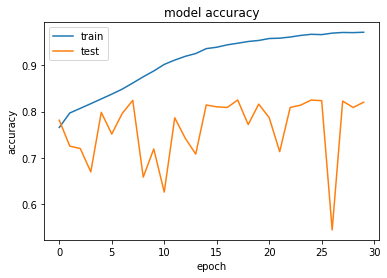

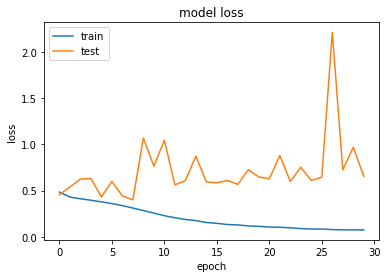

Ende des Versuchs: 
Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_89 (Conv2D)           (None, 15, 40, 200)       6600      
_________________________________________________________________
max_pooling2d_89 (MaxPooling (None, 8, 20, 200)        0         
_________________________________________________________________
batch_normalization_142 (Bat (None, 8, 20, 200)        800       
_________________________________________________________________
dropout_142 (Dropout)        (None, 8, 20, 200)        0         
_________________________________________________________________
conv2d_90 (Conv2D)           (None, 8, 20, 200)        640200    
_________________________________________________________________
max_pooling2d_90 (MaxPooling (None, 4, 10, 200)        0         
_________________________________________________________________
batch_normalization_143 (Bat (Non

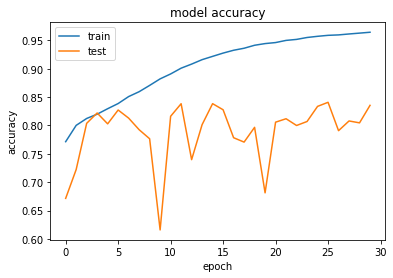

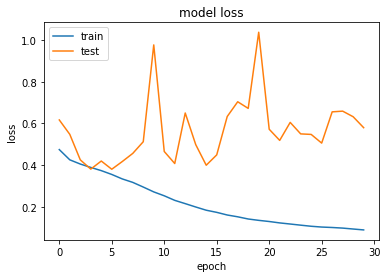

Ende des Versuchs: 


In [12]:
dense_layers = [1,2]
layer_sizes = [160,190,200]
conv_layers = [2,3]
kernal_size = [(2,2),(3,3),(4,4)]
for filter_size in kernal_size:
    for dense_layer in dense_layers:
        for layer_size in layer_sizes:
            for conv_layer in conv_layers:

                NAME ="PMT-MuEl-{}-filter_size-{}-conv-{}-nodes-{}-dense".format(filter_size,conv_layer, layer_size, dense_layer) #,int(time.time())
                tensorboard = TensorBoard(log_dir = 'logs\LAPPD3x3CNN\{}'.format(NAME))


                model = Sequential()
                model.add(Conv2D(layer_size,filter_size,strides=1, input_shape= XTraining.shape[1:],activation="relu", padding='same'))                                               
                model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
                model.add(BatchNormalization())
                model.add(Dropout(0.2))
                for l in range(conv_layer-1):                   
                    model.add(Conv2D(layer_size,filter_size,padding='same',activation="relu"))              
                    model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
                    model.add(BatchNormalization())
                    model.add(Dropout(0.2))            
                #model.add(GlobalAveragePooling2D())
                model.add(Flatten())
                for l in range(dense_layer-1):
                    model.add(Dense(512-l*20 ,activation="relu" ))
                    model.add(BatchNormalization())
                    model.add(Dropout(0.2))
                model.add(Dense(32,activation="relu"))
                model.add(BatchNormalization())
                model.add(Dropout(0.2))
                model.add(Dense(2))
                model.add(Activation('softmax'))
                #adam = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, amsgrad=True, epsilon = 0.001)
                model.compile(loss="binary_crossentropy",
                             optimizer="adam",
                              metrics=['accuracy']
                             )   
                filepath="LAPPD(1x1)_PID_120k-improvement-val-acc_{val_acc:.2f}.model"  
                checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
                #monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto', restore_best_weights=False)
                model.summary()
                history=model.fit(
                    
                    XTraining,YTraining,
              #validation_data=(XVal,Yval)
                 validation_data=(XVal,Yval)   
                    
              ,batch_size=100,
                shuffle=True,
                class_weight='balanced',
                callbacks=[
                            #monitor,
                            #checkpoint,
                            tensorboard 
                ],
              epochs= 30)
                print(history.history.keys())
                # summarize history for accuracy
                plt.plot(history.history['acc'])
                plt.plot(history.history['val_acc'])
                plt.title('model accuracy')
                plt.ylabel('accuracy')
                plt.xlabel('epoch')
                plt.legend(['train', 'test'], loc='upper left')
                plt.show()
                # summarize history for loss
                plt.plot(history.history['loss'])
                plt.plot(history.history['val_loss'])
                plt.title('model loss')
                plt.ylabel('loss')
                plt.xlabel('epoch')
                plt.legend(['train', 'test'], loc='upper left')
                plt.show()

                print("Ende des Versuchs: ")
            

# Best Modell

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 15, 40, 190)       1710      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 15, 40, 190)       144590    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 20, 190)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 8, 20, 190)        760       
_________________________________________________________________
dropout_4 (Dropout)          (None, 8, 20, 190)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 20, 190)        144590    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 10, 190)       

Epoch 48/80
84600/85000 [============================>.] - ETA: 0s - loss: 0.1486 - acc: 0.9392
Epoch 00048: val_acc did not improve from 0.86145
85000/85000 [==============================] - 16s 187us/sample - loss: 0.1487 - acc: 0.9391 - val_loss: 0.4445 - val_acc: 0.8512
Epoch 49/80
84900/85000 [============================>.] - ETA: 0s - loss: 0.1478 - acc: 0.9397
Epoch 00049: val_acc did not improve from 0.86145
85000/85000 [==============================] - 16s 187us/sample - loss: 0.1477 - acc: 0.9398 - val_loss: 0.3750 - val_acc: 0.8580
Epoch 50/80
84800/85000 [============================>.] - ETA: 0s - loss: 0.1476 - acc: 0.9401- ETA: 1s - loss: 0
Epoch 00050: val_acc did not improve from 0.86145
85000/85000 [==============================] - 16s 188us/sample - loss: 0.1475 - acc: 0.9402 - val_loss: 0.4031 - val_acc: 0.8517
Epoch 51/80
84800/85000 [============================>.] - ETA: 0s - loss: 0.1446 - acc: 0.9411
Epoch 00051: val_acc did not improve from 0.86145
85000/8

Epoch 78/80
84700/85000 [============================>.] - ETA: 0s - loss: 0.1183 - acc: 0.9534
Epoch 00078: val_acc did not improve from 0.86145
85000/85000 [==============================] - 16s 187us/sample - loss: 0.1183 - acc: 0.9534 - val_loss: 0.4740 - val_acc: 0.8102
Epoch 79/80
84900/85000 [============================>.] - ETA: 0s - loss: 0.1180 - acc: 0.9523
Epoch 00079: val_acc did not improve from 0.86145
85000/85000 [==============================] - 16s 187us/sample - loss: 0.1180 - acc: 0.9523 - val_loss: 0.6022 - val_acc: 0.8416
Epoch 80/80
84600/85000 [============================>.] - ETA: 0s - loss: 0.1133 - acc: 0.9550
Epoch 00080: val_acc did not improve from 0.86145
85000/85000 [==============================] - 16s 188us/sample - loss: 0.1134 - acc: 0.9550 - val_loss: 0.4948 - val_acc: 0.8522
dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


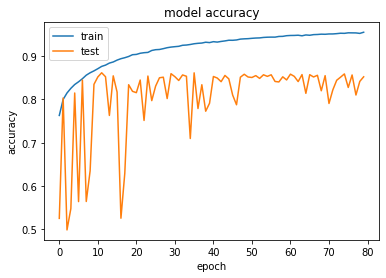

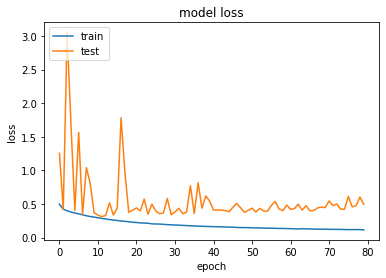

Ende des Versuchs: 


In [6]:
dense_layers = [1]
layer_sizes = [190] #190
conv_layers = [3]
kernal_size = [(2,2)]
for filter_size in kernal_size:
    for dense_layer in dense_layers:
        for layer_size in layer_sizes:
            for conv_layer in conv_layers:

                NAME ="PMT-MuEl-{}-filter_size-{}-conv-{}-nodes-{}-dense".format(filter_size,conv_layer, layer_size, dense_layer) #,int(time.time())
                tensorboard = TensorBoard(log_dir = 'logs\LAPPD5x5CNN\{}'.format(NAME))


                model = Sequential()
                model.add(Conv2D(layer_size,filter_size,strides=1, input_shape= XTraining.shape[1:],activation="relu", padding='same'))                                               
                model.add(Conv2D(layer_size,filter_size,padding='same',activation="relu"))  
                model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
                model.add(BatchNormalization())
                model.add(Dropout(0.2))
                for l in range(conv_layer-1):                   
                    model.add(Conv2D(layer_size,filter_size,padding='same',activation="relu"))              
                    model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
                    model.add(BatchNormalization())
                    model.add(Dropout(0.2))            
                #model.add(GlobalAveragePooling2D())
                model.add(Flatten())
                for l in range(dense_layer-1):
                    model.add(Dense(512-l*20 ,activation="relu" ))
                    model.add(BatchNormalization())
                    model.add(Dropout(0.2))
                model.add(Dense(32,activation="relu"))
                model.add(BatchNormalization())
                model.add(Dropout(0.2))
                model.add(Dense(2))
                model.add(Activation('softmax'))
                #adam = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, amsgrad=True, epsilon = 0.001)
                model.compile(loss="binary_crossentropy",
                             optimizer="adam",
                              metrics=['accuracy']
                             )   
                filepath="LAPPD(5x5)_PID_120k-improvement_Timeflipped_V3-val-acc_{val_acc:.2f}.model"  
                checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
                #monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto', restore_best_weights=False)
                model.summary()
                history=model.fit(
                    
                    XTraining,YTraining,
              #validation_data=(XVal,Yval)
                 validation_data=(XVal,Yval)   
                    
              ,batch_size=100,
                shuffle=True,
                class_weight='balanced',
                callbacks=[
                            #monitor,
                            checkpoint,
                            #tensorboard 
                ],
              epochs= 80)
                print(history.history.keys())
                # summarize history for accuracy
                plt.plot(history.history['acc'])
                plt.plot(history.history['val_acc'])
                plt.title('model accuracy')
                plt.ylabel('accuracy')
                plt.xlabel('epoch')
                plt.legend(['train', 'test'], loc='upper left')
                plt.show()
                # summarize history for loss
                plt.plot(history.history['loss'])
                plt.plot(history.history['val_loss'])
                plt.title('model loss')
                plt.ylabel('loss')
                plt.xlabel('epoch')
                plt.legend(['train', 'test'], loc='upper left')
                plt.show()

                print("Ende des Versuchs: ")
            

# Evaluate

In [8]:
model = tf.keras.models.load_model("LAPPD(5x5)_PID_120k-improvement_Timeflipped_V2-val-acc_0.86.model")

W0615 17:59:42.333138 19672 deprecation.py:506] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Tensorflow\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0615 17:59:42.333138 19672 deprecation.py:506] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Tensorflow\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0615 17:59:42.364342 19672 deprecation.py:506] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_6

In [9]:
score = model.evaluate(XTest, YTest, verbose=False) 
model.metrics_names
print('Test score: ', score[0])    #Loss on test
print('Test accuracy: ', score[1])

Test score:  0.3509173695602563
Test accuracy:  0.85971344


In [14]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
 
    print(cm)
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
 
    fmt = '.3f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [13]:


rounded_labels =np.argmax(YTest, axis=1)
y_prob = np.array(model.predict(XTest, batch_size=128, verbose=0))
y_classes = y_prob.argmax(axis=-1)
cm = confusion_matrix(rounded_labels, y_classes)
print(cm)


[[5940 1525]
 [ 580 6960]]


[[0.79571333 0.20428667]
 [0.07692308 0.92307692]]


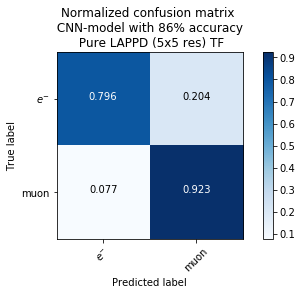

In [15]:
# Reshape into 2 x 2 matrix
cm = cm.reshape((2,2))
 
class_names = [r"$e^{-}$", "muon"]
 
    
# Plot normalized confusion matrix
f=plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix \n CNN-model with 86% accuracy \n Pure LAPPD (5x5 res) TF')
#f.savefig("Confusion-CNN-85-Prozent-MultiChannel-2-conv-130-nodes-2-dense.pdf",format ="pdf", bbox_inches='tight') 
plt.show()

# Perceptron

W0626 19:41:33.310757 29500 deprecation.py:506] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Tensorflow\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 15, 40, 2)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 1200)              0         
_________________________________________________________________
dense (Dense)                (None, 600)               720600    
_________________________________________________________________
batch_normalization (BatchNo (None, 600)               2400      
_________________________________________________________________
dropout (Dropout)            (None, 600)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 600)               360600    
_________________________________________________________________
batch_normalization_1 (Batch (None, 600)               2400  

84992/85000 [============================>.] - ETA: 0s - loss: 0.3445 - acc: 0.8459
Epoch 00018: val_acc improved from 0.79705 to 0.79830, saving model to Perceptron-5x5LAPPD-PID-_tf_val-acc_0.80.model
85000/85000 [==============================] - 8s 89us/sample - loss: 0.3445 - acc: 0.8459 - val_loss: 0.4480 - val_acc: 0.7983
Epoch 19/80
84864/85000 [============================>.] - ETA: 0s - loss: 0.3362 - acc: 0.8507
Epoch 00019: val_acc did not improve from 0.79830
85000/85000 [==============================] - 7s 87us/sample - loss: 0.3362 - acc: 0.8507 - val_loss: 0.4598 - val_acc: 0.7979
Epoch 20/80
84480/85000 [============================>.] - ETA: 0s - loss: 0.3275 - acc: 0.8556
Epoch 00020: val_acc improved from 0.79830 to 0.80020, saving model to Perceptron-5x5LAPPD-PID-_tf_val-acc_0.80.model
85000/85000 [==============================] - 8s 89us/sample - loss: 0.3271 - acc: 0.8558 - val_loss: 0.4584 - val_acc: 0.8002
Epoch 21/80
84992/85000 [============================>

Epoch 48/80
84736/85000 [============================>.] - ETA: 0s - loss: 0.1686 - acc: 0.9312
Epoch 00048: val_acc did not improve from 0.80020
85000/85000 [==============================] - 8s 89us/sample - loss: 0.1686 - acc: 0.9311 - val_loss: 0.6397 - val_acc: 0.7893
Epoch 49/80
84224/85000 [============================>.] - ETA: 0s - loss: 0.1610 - acc: 0.9347
Epoch 00049: val_acc did not improve from 0.80020
85000/85000 [==============================] - 7s 88us/sample - loss: 0.1609 - acc: 0.9349 - val_loss: 0.6720 - val_acc: 0.7912
Epoch 50/80
84480/85000 [============================>.] - ETA: 0s - loss: 0.1558 - acc: 0.9370
Epoch 00050: val_acc did not improve from 0.80020
85000/85000 [==============================] - 8s 89us/sample - loss: 0.1559 - acc: 0.9369 - val_loss: 0.6832 - val_acc: 0.7894
Epoch 51/80
84736/85000 [============================>.] - ETA: 0s - loss: 0.1534 - acc: 0.9379
Epoch 00051: val_acc did not improve from 0.80020
85000/85000 [===================

Epoch 78/80
84608/85000 [============================>.] - ETA: 0s - loss: 0.0990 - acc: 0.9615
Epoch 00078: val_acc did not improve from 0.80020
85000/85000 [==============================] - 7s 88us/sample - loss: 0.0990 - acc: 0.9615 - val_loss: 0.8238 - val_acc: 0.7742
Epoch 79/80
84736/85000 [============================>.] - ETA: 0s - loss: 0.0934 - acc: 0.9642
Epoch 00079: val_acc did not improve from 0.80020
85000/85000 [==============================] - 7s 87us/sample - loss: 0.0936 - acc: 0.9641 - val_loss: 0.8108 - val_acc: 0.7825
Epoch 80/80
84992/85000 [============================>.] - ETA: 0s - loss: 0.0952 - acc: 0.9636
Epoch 00080: val_acc did not improve from 0.80020
85000/85000 [==============================] - 7s 87us/sample - loss: 0.0952 - acc: 0.9636 - val_loss: 0.8091 - val_acc: 0.7853
dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


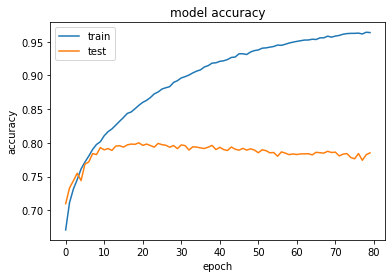

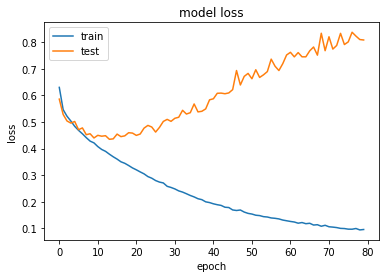

Ende des Versuchs: 


In [4]:
Tiefe = [5]
Batchgrose = [128]
Breite = [600]
    
for deep in Tiefe:
    for batch in Batchgrose:
        for breit in Breite:

            
            
            NAME ="Perceptron-PMT-Charge-MuEl-{}-deep-{}-nodes-{}-batchsize".format(deep, breit, batch) #,int(time.time())
            tensorboard = TensorBoard(log_dir = 'logs\PMTsmallPerceptron\{}'.format(NAME))


            
            
            inputs = tf.keras.Input(shape=XTraining.shape[1:], name='img')
            x= layers.Flatten()(inputs)
            for d in range(deep):
                
                x = layers.Dense(breit, activation='sigmoid')(x)
                x = layers.BatchNormalization()(x)
                x = layers.Dropout(0.2)(x)
                
            outputs = layers.Dense(2, activation='softmax')(x)
            model = tf.keras.Model(inputs, outputs, name='Model')
            model.summary()

            
            
            filepath="Perceptron-5x5LAPPD-PID-_tf_val-acc_{val_acc:.2f}.model" 
            checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
            model.compile(
            optimizer='adam',
            #optimizer = keras.optimizers.RMSprop(1e-3),
            loss='categorical_crossentropy',
            metrics=['acc'])

            history=model.fit(XTraining,YTraining,
                              validation_data=(XVal,Yval)
                              ,batch_size=batch,
                                shuffle=True,
                                class_weight='balanced',
            callbacks=[
                        #monitor,
                        checkpoint,
                        #tensorboard 
            ],
          epochs= 80)
            print(history.history.keys())
# summarize history for accuracy
            plt.plot(history.history['acc'])
            plt.plot(history.history['val_acc'])
            plt.title('model accuracy')
            plt.ylabel('accuracy')
            plt.xlabel('epoch')
            plt.legend(['train', 'test'], loc='upper left')
            plt.show()
            # summarize history for loss
            plt.plot(history.history['loss'])
            plt.plot(history.history['val_loss'])
            plt.title('model loss')
            plt.ylabel('loss')
            plt.xlabel('epoch')
            plt.legend(['train', 'test'], loc='upper left')
            plt.show()

            print("Ende des Versuchs: ")


# Perceptron

In [6]:
model = tf.keras.models.load_model("Perceptron-5x5LAPPD-PID-_tf_val-acc_0.80.model")

W0626 20:03:39.032976 29500 deprecation.py:506] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Tensorflow\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0626 20:03:39.032976 29500 deprecation.py:506] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Tensorflow\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0626 20:03:39.032976 29500 deprecation.py:506] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_6

In [7]:
score = model.evaluate(XTest, YTest, verbose=False) 
model.metrics_names
print('Test score: ', score[0])    #Loss on test
print('Test accuracy: ', score[1])

Test score:  0.4575887875571246
Test accuracy:  0.7989337


In [9]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
 
    print(cm)
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
 
    fmt = '.3f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [10]:


rounded_labels =np.argmax(YTest, axis=1)
y_prob = np.array(model.predict(XTest, batch_size=128, verbose=0))
y_classes = y_prob.argmax(axis=-1)
cm = confusion_matrix(rounded_labels, y_classes)
print(cm)


[[5541 2035]
 [ 982 6447]]


[[0.7313886  0.2686114 ]
 [0.13218468 0.86781532]]


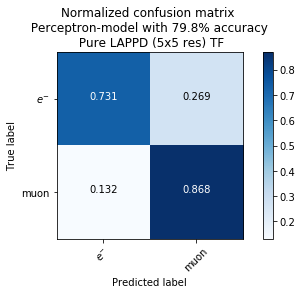

In [11]:
# Reshape into 2 x 2 matrix
cm = cm.reshape((2,2))
 
class_names = [r"$e^{-}$", "muon"]
 
    
# Plot normalized confusion matrix
f=plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix \n Perceptron-model with 79.8% accuracy \n Pure LAPPD (5x5 res) TF')
#f.savefig("Confusion-CNN-85-Prozent-MultiChannel-2-conv-130-nodes-2-dense.pdf",format ="pdf", bbox_inches='tight') 
plt.show()

Model: "Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 15, 40, 2)]       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1200)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 50)                60050     
_________________________________________________________________
batch_normalization_5 (Batch (None, 50)                200       
_________________________________________________________________
dropout_5 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 50)                2550      
_________________________________________________________________
batch_normalization_6 (Batch (None, 50)                200   

84608/85000 [============================>.] - ETA: 0s - loss: 0.4354 - acc: 0.7937
Epoch 00019: val_acc improved from 0.77855 to 0.78035, saving model to Perceptron_LAPPD_5x5_PID_120k-improvement_tf_V2-val-acc_0.78.model
85000/85000 [==============================] - 6s 66us/sample - loss: 0.4354 - acc: 0.7937 - val_loss: 0.4571 - val_acc: 0.7804
Epoch 20/80
84992/85000 [============================>.] - ETA: 0s - loss: 0.4310 - acc: 0.7961
Epoch 00020: val_acc improved from 0.78035 to 0.78195, saving model to Perceptron_LAPPD_5x5_PID_120k-improvement_tf_V2-val-acc_0.78.model
85000/85000 [==============================] - 6s 66us/sample - loss: 0.4310 - acc: 0.7961 - val_loss: 0.4557 - val_acc: 0.7819
Epoch 21/80
84096/85000 [============================>.] - ETA: 0s - loss: 0.4294 - acc: 0.7975
Epoch 00021: val_acc did not improve from 0.78195
85000/85000 [==============================] - 5s 63us/sample - loss: 0.4294 - acc: 0.7975 - val_loss: 0.4598 - val_acc: 0.7798
Epoch 22/80
84

Epoch 48/80
84352/85000 [============================>.] - ETA: 0s - loss: 0.3716 - acc: 0.8321
Epoch 00048: val_acc did not improve from 0.78220
85000/85000 [==============================] - 6s 65us/sample - loss: 0.3717 - acc: 0.8320 - val_loss: 0.4859 - val_acc: 0.7756
Epoch 49/80
84480/85000 [============================>.] - ETA: 0s - loss: 0.3684 - acc: 0.8340
Epoch 00049: val_acc did not improve from 0.78220
85000/85000 [==============================] - 5s 65us/sample - loss: 0.3685 - acc: 0.8339 - val_loss: 0.4830 - val_acc: 0.7740
Epoch 50/80
84480/85000 [============================>.] - ETA: 0s - loss: 0.3672 - acc: 0.8342
Epoch 00050: val_acc did not improve from 0.78220
85000/85000 [==============================] - 6s 66us/sample - loss: 0.3672 - acc: 0.8342 - val_loss: 0.4876 - val_acc: 0.7721
Epoch 51/80
84224/85000 [============================>.] - ETA: 0s - loss: 0.3656 - acc: 0.8361
Epoch 00051: val_acc did not improve from 0.78220
85000/85000 [===================

Epoch 78/80
84608/85000 [============================>.] - ETA: 0s - loss: 0.3372 - acc: 0.8528
Epoch 00078: val_acc did not improve from 0.78220
85000/85000 [==============================] - 6s 72us/sample - loss: 0.3372 - acc: 0.8528 - val_loss: 0.5192 - val_acc: 0.7664
Epoch 79/80
84096/85000 [============================>.] - ETA: 0s - loss: 0.3307 - acc: 0.8569
Epoch 00079: val_acc did not improve from 0.78220
85000/85000 [==============================] - 6s 74us/sample - loss: 0.3309 - acc: 0.8567 - val_loss: 0.5257 - val_acc: 0.7621
Epoch 80/80
84352/85000 [============================>.] - ETA: 0s - loss: 0.3328 - acc: 0.8549
Epoch 00080: val_acc did not improve from 0.78220
85000/85000 [==============================] - 6s 72us/sample - loss: 0.3325 - acc: 0.8550 - val_loss: 0.5276 - val_acc: 0.7632
dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


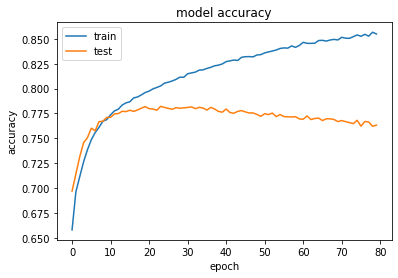

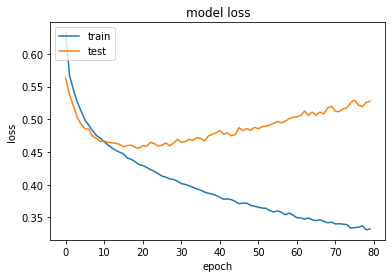

Ende des Versuchs: 


In [5]:
Tiefe = [3]
Batchgrose = [128]
Breite = [50]
    
for deep in Tiefe:
    for batch in Batchgrose:
        for breit in Breite:

            
            
            NAME ="Perceptron-PMT-Charge-MuEl-{}-deep-{}-nodes-{}-batchsize".format(deep, breit, batch) #,int(time.time())
            tensorboard = TensorBoard(log_dir = 'logs\LAPPD5x5Perceptron\{}'.format(NAME))


            
            
            inputs = tf.keras.Input(shape=XTraining.shape[1:], name='img')
            x= layers.Flatten()(inputs)
            for d in range(deep):
                
                x = layers.Dense(breit, activation='sigmoid')(x)
                x = layers.BatchNormalization()(x)
                x = layers.Dropout(0.2)(x)
                
            outputs = layers.Dense(2, activation='softmax')(x)
            model = tf.keras.Model(inputs, outputs, name='Model')
            model.summary()
                          
            filepath="Perceptron_LAPPD_5x5_PID_120k-improvement_tf_V2-val-acc_{val_acc:.2f}.model"  
            checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

            model.compile(
            optimizer='adam',
            #optimizer = keras.optimizers.RMSprop(1e-3),
            loss='categorical_crossentropy',
            metrics=['acc'])

            history=model.fit(XTraining,YTraining,
                              validation_data=(XVal,Yval)
                              ,batch_size=batch,
                                shuffle=True,
                                class_weight='balanced',
            callbacks=[
                        #monitor,
                        checkpoint
                        #tensorboard 
            ],epochs=80)
          
        
            print(history.history.keys())
            # summarize history for accuracy
            plt.plot(history.history['acc'])
            plt.plot(history.history['val_acc'])
            plt.title('model accuracy')
            plt.ylabel('accuracy')
            plt.xlabel('epoch')
            plt.legend(['train', 'test'], loc='upper left')
            plt.show()
            # summarize history for loss
            plt.plot(history.history['loss'])
            plt.plot(history.history['val_loss'])
            plt.title('model loss')
            plt.ylabel('loss')
            plt.xlabel('epoch')
            plt.legend(['train', 'test'], loc='upper left')
            plt.show()

            print("Ende des Versuchs: ")


# Tensorboard

cd "Documents\Python\CNN_Masterarbeit"

tensorboard --logdir=logs/ --host localhost --port 8088

tensorboard --logdir=logs/Overfitting_Studie --host localhost --port 8088

tensorboard --logdir=logs/Modell_Studie --host localhost --port 8088

tensorboard --logdir=logs/MuonElectron --host localhost --port 8088

tensorboard --logdir=BeamlikePI/logs/Time --host localhost --port 8088

# Evaluate

In [67]:
XTest.shape

(15005, 10, 16, 2)

In [82]:
pickle_out = open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/X_Test_LAPPD(1x1)_120k.pickle","wb")
pickle.dump(XTest,pickle_out,protocol=4)
pickle_out.close()
pickle_out = open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/Y_Test_LAPPD(1x1)_120k.pickle","wb")
pickle.dump(YTest,pickle_out,protocol=4)
pickle_out.close()

In [30]:
model = tf.keras.models.load_model("PMT_24_PID_120k-improvement-val-acc_0.84.model")

W0521 13:34:22.750493  8792 deprecation.py:506] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Tensorflow\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0521 13:34:22.766009  8792 deprecation.py:506] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Tensorflow\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0521 13:34:22.781656  8792 deprecation.py:506] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_6

In [77]:
#LAPPD
model = tf.keras.models.load_model("LAPPD(1x1)_PID_120k-improvement-val-acc_0.83.model")

#Combined
#model = tf.keras.models.load_model("PMTOnly_Combined_PI_120k-60epoch_-improvement-val-acc_0.93.model")
#model = tf.keras.models.load_model("PMTOnly_Combined_PI_22k-80epoch-improvement-val-acc_0.92.model")
#Time
#model = tf.keras.models.load_model("PMT_Time_Only_batchnormed_PI_22k-improvement-val-acc_0.81.model")
#Charge
#model = tf.keras.models.load_model("PMT_Charge_Only_batchnormed_PI_22k-improvement-val-acc_0.93.model")

In [6]:
len(X)

120005

In [8]:
XTestC = X[:,:,:,0].reshape(120005,10,16,1)

In [12]:

print(XTestC.shape,Y.shape)
for sample in Y[:20]:
    print(sample)

(120005, 10, 16, 1) (120005, 2)
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]


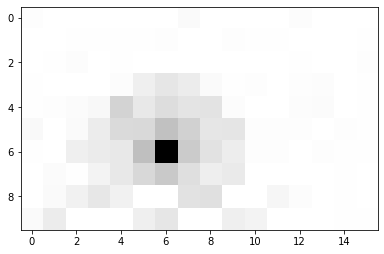

In [75]:
plt.imshow(XTest[7,:,:,0], cmap='binary', interpolation='None')

## Combined

In [78]:
### LAPPD
score = model.evaluate(XTest, YTest, verbose=False) 
model.metrics_names
print('Test score: ', score[0])    #Loss on test
print('Test accuracy: ', score[1])

Test score:  0.36467623370204594
Test accuracy:  0.8353882


In [56]:
score = model.evaluate(XTest, YTest, verbose=False) 
model.metrics_names
print('Test score: ', score[0])    #Loss on test
print('Test accuracy: ', score[1])

Test score:  0.35680383114329917
Test accuracy:  0.90992105


## Charge

In [13]:
score = model.evaluate(XTestC, Y, verbose=False) 
model.metrics_names
print('Test score: ', score[0])    #Loss on test
print('Test accuracy: ', score[1])

Test score:  0.23812034977390828
Test accuracy:  0.90469563


In [85]:
score = model.evaluate(XTestC, YTest, verbose=False) 
model.metrics_names
print('Test score: ', score[0])    #Loss on test
print('Test accuracy: ', score[1])

Test score:  0.19774321766031458
Test accuracy:  0.92719644


## Time

In [33]:
score = model.evaluate(XTestT, YTest, verbose=False) 
model.metrics_names
print('Test score: ', score[0])    #Loss on test
print('Test accuracy: ', score[1])

Test score:  0.4832646434304745
Test accuracy:  0.8005923


# Confusion matrix


In [79]:

#prediction = model.predict(XTestC)
#print(prediction.shape,YTest.shape)
rounded_labels =np.argmax(YTest, axis=1)
y_prob = np.array(model.predict(XTest, batch_size=128, verbose=0))
y_classes = y_prob.argmax(axis=-1)
cm = confusion_matrix(rounded_labels, y_classes)
print(cm)


[[5818 1629]
 [ 841 6717]]


In [56]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
 
    print(cm)
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
 
    fmt = '.3f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## LAPPD

[[0.7812542  0.2187458 ]
 [0.11127282 0.88872718]]


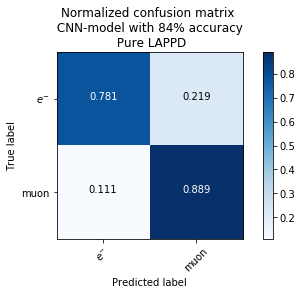

In [80]:
# Reshape into 2 x 2 matrix
cm = cm.reshape((2,2))
 
class_names = [r"$e^{-}$", "muon"]
 
    
# Plot normalized confusion matrix
f=plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix \n CNN-model with 84% accuracy \n Pure LAPPD')
#f.savefig("Confusion-CNN-85-Prozent-MultiChannel-2-conv-130-nodes-2-dense.pdf",format ="pdf", bbox_inches='tight') 
plt.show()

## ALL PMTS

[[0.90041109 0.09958891]
 [0.03416399 0.96583601]]


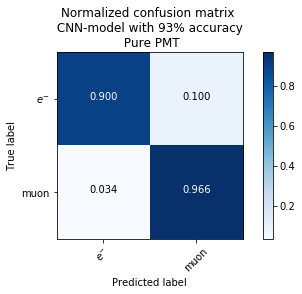

In [58]:
# Reshape into 2 x 2 matrix
cm = cm.reshape((2,2))
 
class_names = [r"$e^{-}$", "muon"]
 
    
# Plot normalized confusion matrix
f=plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix \n CNN-model with 93% accuracy \n Pure PMT')
#f.savefig("Confusion-CNN-85-Prozent-MultiChannel-2-conv-130-nodes-2-dense.pdf",format ="pdf", bbox_inches='tight') 
plt.show()

# 24 PMTs

In [62]:
cm2=[[0.79498861,0.20501139],
 [0.11230443,0.88769557]]

[[0.79498861 0.20501139]
 [0.11230443 0.88769557]]


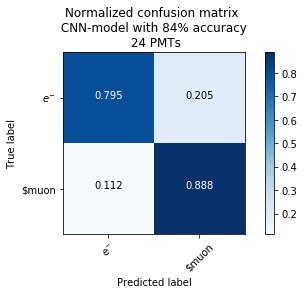

In [81]:
# Reshape into 2 x 2 matrix
#cm = cm.reshape((2,2))
cm2=np.array(cm2)
class_names = [r"$e^{-}$", "$muon"]
 
    
# Plot normalized confusion matrix
f=plt.figure()
plot_confusion_matrix(cm2, classes=class_names, normalize=True,
                      title='Normalized confusion matrix \n CNN-model with 84% accuracy \n 24 PMTs')
#f.savefig("Confusion-CNN-85-Prozent-MultiChannel-2-conv-130-nodes-2-dense.pdf",format ="pdf", bbox_inches='tight') 
plt.show()

In [45]:
from tensorflow import keras
import pydot_ng as pydot
from keras.utils.vis_utils import model_to_dot
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

Using TensorFlow backend.


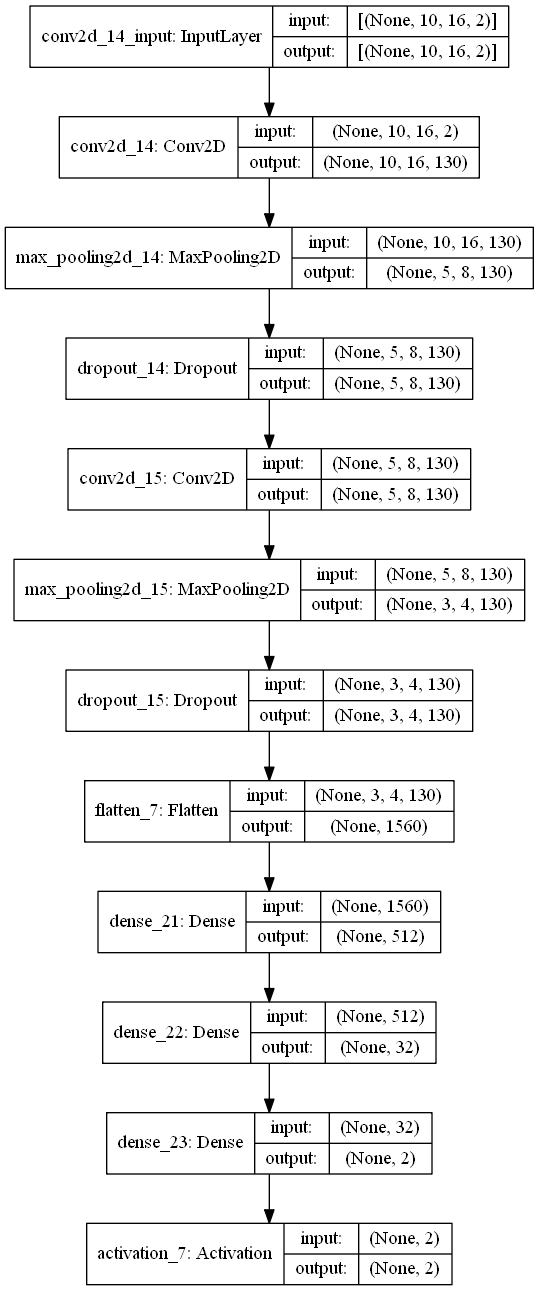

In [46]:
keras.utils.plot_model(model, 'my_first_model_with_shape_info.png', show_shapes=True)

In [53]:
from matplotlib import pyplot

conv2d_12 (5, 5, 2, 130)


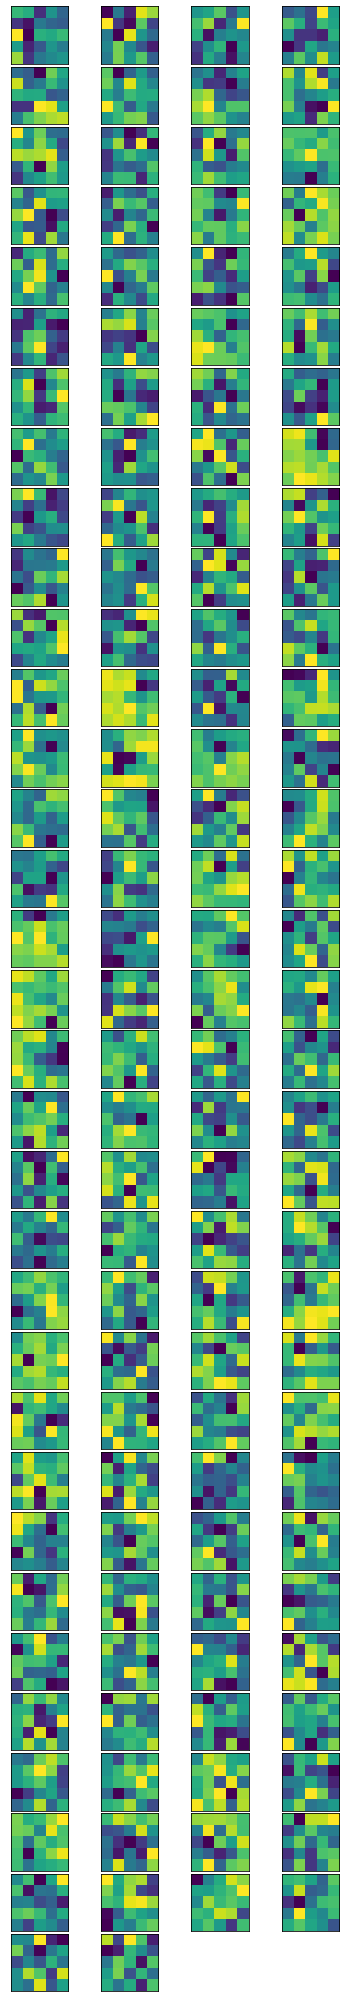

In [56]:
#summarize filter shapes
pyplot.subplots_adjust(wspace = 0.05 ,hspace = 0.05)
for layer in model.layers:
    #check for conv. layer
    if 'conv' not in layer.name:
        continue
    #get filter weights
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)
    f_min, f_max= filters.min(),filters.max()
    filters = (filters-f_min)/(f_max-f_min)
    # plot first few filters
    

    n_filters, ix = 130, 1


    for i in range(n_filters):
        #get the filter
        f = filters[:, :, :, i]
        # plot each channel separately

      


        ax = pyplot.subplot(n_filters, 4, ix)
        
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        pyplot.imshow(f[:,:, 1], cmap='viridis')
        ix += 1
    # show the figure
    #pyplot.savefig("PMT Model 85% layer0 ALL ConvFilters-Time.jpg",format ="jpg", bbox_inches='tight')
    pyplot.show()
    
    break

In [120]:
for j in range(1):
    print(j)

0


In [55]:
plt.rcParams['figure.figsize'] = [6.4, 30*4.8]

In [57]:
for i in range(len(model.layers)):
    layer = model.layers[i]
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    print(i, layer.name, layer.output.shape)

0 conv2d_12 (?, 10, 16, 130)
3 conv2d_13 (?, 5, 8, 130)


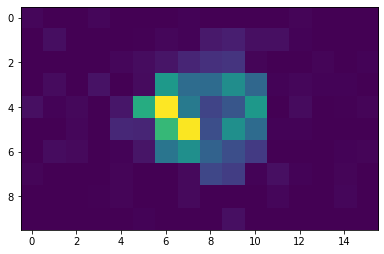

In [58]:
plt.imshow(X[9,:,:,0], cmap='viridis', interpolation='None')

In [86]:
plt.rcParams['figure.figsize'] = [6.4, 10*4.8]

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14_input (InputLayer) [(None, 10, 16, 2)]       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 10, 16, 130)       6630      
Total params: 6,630
Trainable params: 6,630
Non-trainable params: 0
_________________________________________________________________
(1, 10, 16, 130)


ValueError: num must be 1 <= num <= 52, not 53

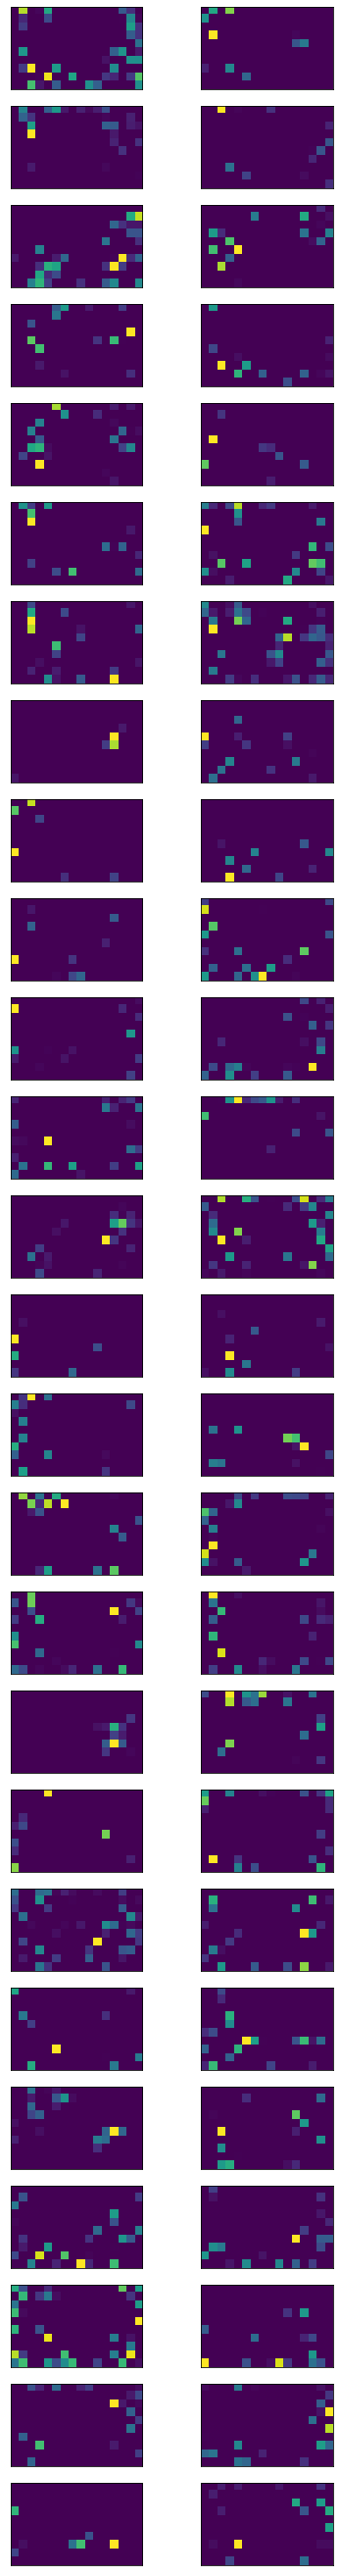

In [89]:
model = tf.keras.models.load_model("PMTOnly_PI_22k_RANDOM-improvement-val-acc_0.93.model")

from tensorflow.keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims



ixs = [0]

outputs = [model.layers[i].output for i in ixs]



model = Model(inputs=model.inputs, outputs=model.layers[0].output)

model.summary()





# get feature map for first hidden layer
feature_maps = model.predict(XTest[9:10])
print(feature_maps.shape)
# plot all 64 maps in an 8x8 squares

#for fmap in feature_maps:
ix = 1
a=130
for _ in range(a):
    for _ in range(a):
        if ix==a+1:
            break
        # specify subplot and turn of axis
        ax = pyplot.subplot(26, 2, ix)
        ax.set_xticks([])
        ax.set_yticks([])

        # plot filter channel in grayscale
        pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='viridis')
        ix += 1
    # show the figure
#pyplot.savefig("PMT layer0 ALL Conv ElectronEvent9.jpg",format ="jpg", bbox_inches='tight')
pyplot.show()
